In [1]:
import torch
from torch_geometric.loader import DataLoader  # Use PyTorch Geometric's DataLoader
from torchvision import datasets, transforms    
import os
from _04_mnist_digits.graph_dataset import GraphDataset
import matplotlib.pyplot as plt
from shared.img_to_graph import img_to_graph
import scipy

# Define a transform to convert the images to tensors
transform = transforms.ToTensor()

# Download and load the MNIST dataset
train_dataset = datasets.MNIST(root='/data', train=True, transform=transform)
test_dataset = datasets.MNIST(root='/data', train=False, transform=transform)

images_train = train_dataset.data
labels_train = train_dataset.targets
images_test = test_dataset.data 
labels_test = test_dataset.targets

print(images_train.shape)
print(images_test.shape)
print(labels_train.shape)
print(labels_test.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
torch.Size([60000])
torch.Size([10000])


torch.Size([27]) torch.Size([95, 2]) torch.Size([95]) torch.Size([27, 2])
torch.Size([24]) torch.Size([86, 2]) torch.Size([86]) torch.Size([24, 2])
torch.Size([26]) torch.Size([95, 2]) torch.Size([95]) torch.Size([26, 2])
torch.Size([18]) torch.Size([56, 2]) torch.Size([56]) torch.Size([18, 2])
torch.Size([26]) torch.Size([97, 2]) torch.Size([97]) torch.Size([26, 2])
torch.Size([25]) torch.Size([106, 2]) torch.Size([106]) torch.Size([25, 2])
torch.Size([17]) torch.Size([46, 2]) torch.Size([46]) torch.Size([17, 2])
torch.Size([30]) torch.Size([99, 2]) torch.Size([99]) torch.Size([30, 2])
torch.Size([18]) torch.Size([48, 2]) torch.Size([48]) torch.Size([18, 2])
torch.Size([22]) torch.Size([79, 2]) torch.Size([79]) torch.Size([22, 2])


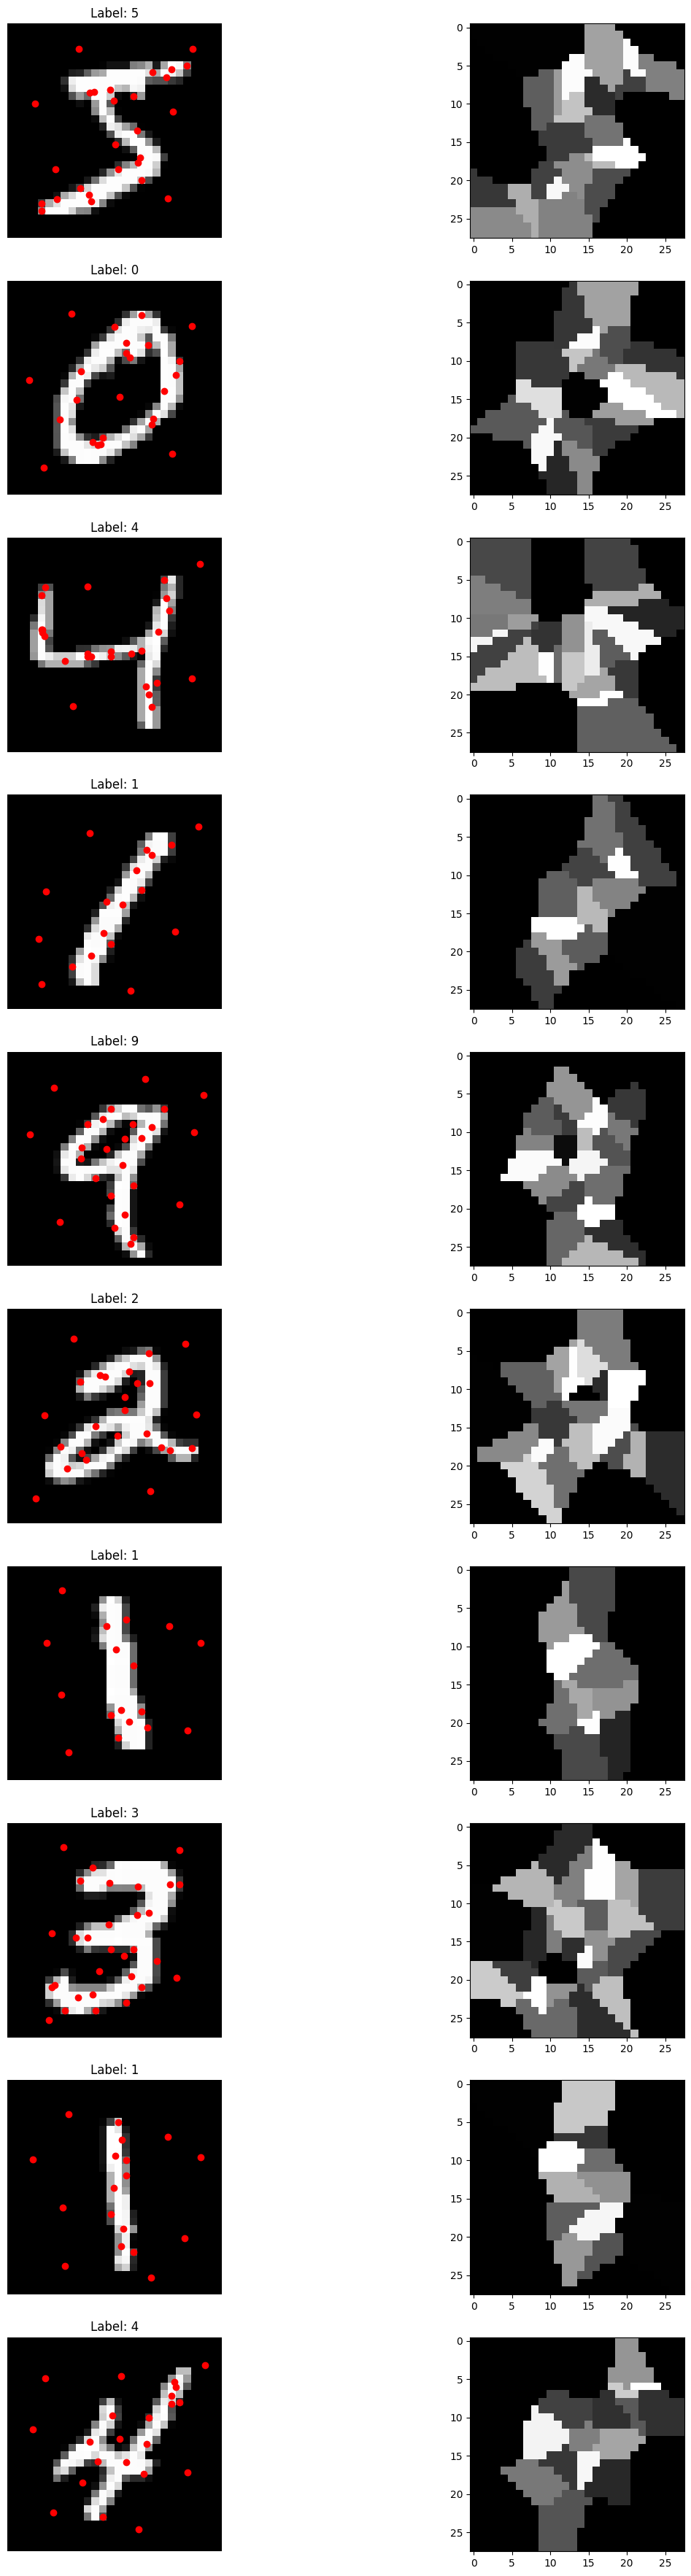

In [ ]:
fig, ax = plt.subplots(10, 2, figsize=(15, 45))

for i in range(10):
    img = images_train[i]

    ax[i, 0].imshow(img, cmap='gray')
    ax[i, 0].set_title(f"Label: {labels_train[i]}")
    ax[i, 0].axis('off')

    colors, edges, edge_index, centroids = img_to_graph(img, quickshift_params={"kernel_size": 1, 
                                                                                "sigma": .1, 
                                                                                "ratio": 1.}, rag_params={"mode": "similarity"})
    print(colors.shape, edges.shape, edge_index.shape, centroids.shape)
    for center in centroids:
        ax[i, 0].plot(center[1], center[0], 'ro')


    mat = torch.zeros([28]*2)
    for row in range(28):
        for col in range(28):
            min_dist = torch.inf
            for center_idx, center in enumerate(centroids):
                dist = torch.norm(torch.FloatTensor([float(row), float(col)]) - center)
                if dist < min_dist:
                    min_dist = dist
                    mat[row, col] = colors[center_idx]
                
    ax[i, 1].imshow(mat, cmap='gray')

